## Библиотеки

In [1]:
import json

## Отдельные графики

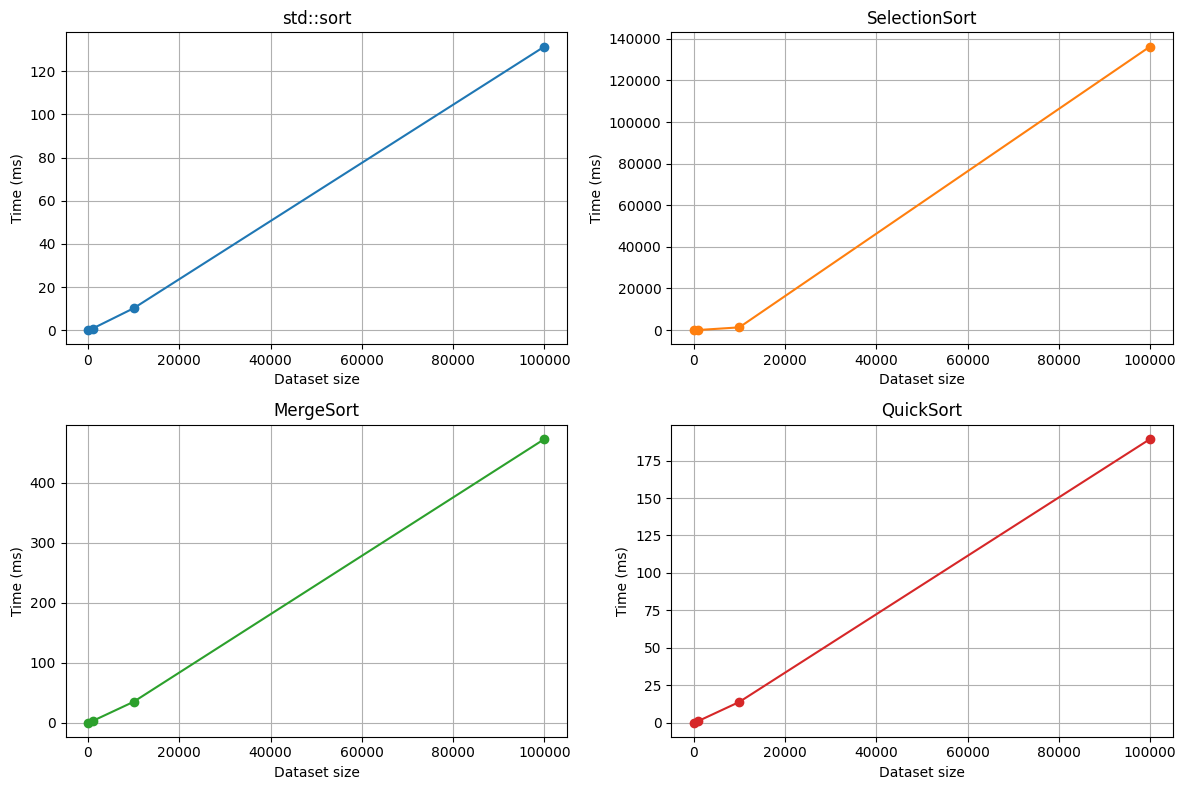

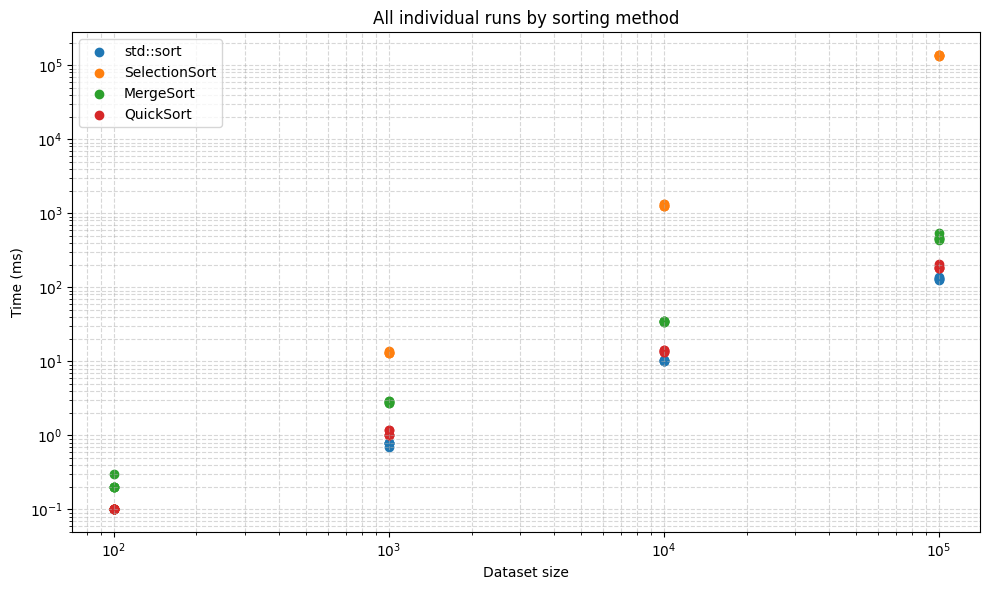

In [14]:
import json
import matplotlib.pyplot as plt

with open("sort_results_old.json", "r") as f:
    results = json.load(f)

sizes = sorted(int(s) for s in results.keys())
methods = ["std::sort", "SelectionSort", "MergeSort", "QuickSort"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False)
axes = axes.flatten()
cmap = plt.get_cmap("tab10")

for ax, method in zip(axes, methods):
    means = []
    for size in sizes:
        times_s = [run["times"][method] for run in results[str(size)]]
        means.append((sum(times_s) / len(times_s)) * 1000)  # to ms
    ax.plot(
        sizes,
        means,
        marker="o",
        linestyle="-",
        color=cmap(methods.index(method)),
        label=method
    )
    ax.set_title(method)
    ax.set_xlabel("Dataset size")
    ax.set_ylabel("Time (ms)")
    ax.grid(True)

plt.tight_layout()

# all raw runs in one plot
fig, ax = plt.subplots(figsize=(10, 6))
for method in methods:
    xs, ys = [], []
    for size in sizes:
        for run in results[str(size)]:
            xs.append(size)
            ys.append(run["times"][method] * 1000)  # to ms
    ax.scatter(
        xs, ys,
        marker="o",
        label=method,
        color=cmap(methods.index(method))
    )

ax.set_xscale('log')       
ax.set_yscale('log')    
ax.set_xlabel("Dataset size")
ax.set_ylabel("Time (ms)")
ax.set_title("All individual runs by sorting method")
ax.legend()
ax.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()
